В этом файле: выявив лучший метод(randomforest), делаем обучение на всей модели. После этого извлекаем признаки с помощью HOG и SIFT, и объединяем признаки в один вектор.

1. Загружаем Dataset

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")
path = os.path.join(path, 'Vegetable Images')
print("Path to dataset files:", path)

100%|██████████| 534M/534M [00:17<00:00, 32.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/misrakahmed/vegetable-image-dataset/versions/1/Vegetable Images


2. Преобразуем изображения в матрицу 64 х 64, извелкаем признаки с помощью SIFT и HOG, преобразуем их в одномерныи вектор и объединяем (1028 значении для каждого изображения), обучаем модель методом RandomForestClassifier.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm.auto import tqdm

# Путь к директориям
base_dir = path
categories = ["train", "test", "validation"]

# Инициализация SIFT и HOG
sift = cv2.SIFT_create()

def extract_sift_features(image):
    """Извлечение SIFT признаков."""
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        return descriptors.flatten()[:128]  # Ограничиваем размер
    return np.zeros(128)  # Пустые изображения

def extract_hog_features(image):
    """Извлечение HOG признаков."""
    win_size = (64, 64)
    cell_size = (8, 8)
    block_size = (16, 16)
    block_stride = (8, 8)
    nbins = 9
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    return hog.compute(image).flatten()

def load_data(base_dir, category):
    """Загрузка изображений и меток."""
    print(f'Начали обработку {category}')
    data = []
    labels = []
    path = os.path.join(base_dir, category)
    for class_name in tqdm(os.listdir(path)):
        class_dir = os.path.join(path, class_name)
        if not os.path.isdir(class_dir):
            continue
        for img_name in tqdm(os.listdir(class_dir)):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                sift_features = extract_sift_features(img)
                hog_features = extract_hog_features(img)
                features = np.concatenate((sift_features, hog_features))
                data.append(features)
                labels.append(class_name)
    return np.array(data), np.array(labels)


# Загрузка данных
train_data, train_labels = load_data(base_dir, "train")
test_data, test_labels = load_data(base_dir, "test")

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_data, train_labels)

test_preds = rf_classifier.predict(test_data)
print(f"Test Accuracy: {accuracy_score(test_labels, test_preds):.2f}")

Начали обработку train


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Начали обработку test


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Test Accuracy: 0.74


3. Визуализация. Выбираем случаиное изображение из папки validation и оцениваем его.

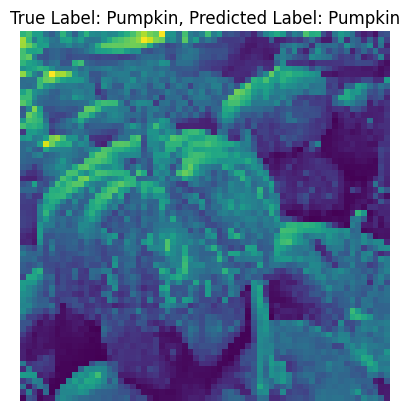

In [ ]:
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder

# Путь к директориям
base_dir = path
categories = ["train", "test", "validation"]

# Инициализация SIFT и HOG
sift = cv2.SIFT_create()

def extract_sift_features(image):
    """Извлечение SIFT признаков."""
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        return descriptors.flatten()[:128]  # Ограничиваем размер
    return np.zeros(128)  # Пустые изображения

def extract_hog_features(image):
    """Извлечение HOG признаков."""
    win_size = (64, 64)
    cell_size = (8, 8)
    block_size = (16, 16)
    block_stride = (8, 8)
    nbins = 9
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    return hog.compute(image).flatten()

def predict_random_validation_image(rf_classifier, base_dir):
    """Предсказывает случайное изображение из валидационной выборки."""
    validation_path = os.path.join(base_dir, "validation")
    classes = os.listdir(validation_path)
    random_class = np.random.choice(classes)
    class_dir = os.path.join(validation_path, random_class)
    images = os.listdir(class_dir)
    random_image = np.random.choice(images)
    image_path = os.path.join(class_dir, random_image)

    # Загружаем изображение
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))
    sift_features = extract_sift_features(img)
    hog_features = extract_hog_features(img)
    features = np.concatenate((sift_features, hog_features)).reshape(1, -1)

    # Делаем предсказание
    prediction = rf_classifier.predict(features)[0]

    # Визуализируем результат
    plt.imshow(img)
    plt.title(f'True Label: {random_class}, Predicted Label: {prediction}')
    plt.axis('off')
    plt.show()

# Используйте уже обученную модель из первой части
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(train_data, train_labels)

# Тестируем на случайном изображении из валидации
predict_random_validation_image(rf_classifier, base_dir)